In [ ]:
!cp -r drive/Shareddrives/Virtuon/Machine\ Learning\ Project/Pre_Trained_Model/* /content

In [ ]:
!pip install tf-bodypix[all]

In [ ]:
!cp -r /content/drive/Shareddrives/Prashant/Clothing\ Coparsing/* /content/data

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2 as cv
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Sequential, Model

import matplotlib.pyplot as plt
%matplotlib inline

from tf_bodypix.api import download_model, load_model, BodyPixModelPaths

In [ ]:
from model import build_model

In [178]:
bodyp = load_model(download_model(
    BodyPixModelPaths.MOBILENET_FLOAT_100_STRIDE_16
))

In [143]:
seg = build_model()

In [144]:
seg.summary()

Model: "SegNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 320, 320, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_26 (BatchNo (None, 320, 320, 64) 256         conv1_1[0][0]                    
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 320, 320, 64) 36928       batch_normalization_26[0][0]     
_____________________________________________________________________________________________

In [145]:
seg.load_weights("model.11-0.8409.hdf5")

In [146]:
img_h, img_w, img_c = (320,320,3)
n_classes = 20
common_interpolation = 'bilinear'

In [147]:
def bodypix_output(img):
    result = bodyp.predict_single(img)
    mask = result.get_mask(threshold = 0.75)
    c_mask = result.get_colored_part_mask(mask)
    # c_mask = tf.math.argmax(c_mask, axis = -1)
    return c_mask

def segnet_output(img):
    output = seg.predict(img.reshape( (1, img_h, img_w, img_c) )/255.0)
    output = output.reshape((img_h, img_w, n_classes))
    return output

In [148]:
x_train = np.load('/content/data/dataset/x_train.npy').astype(np.float32)
x_test = np.load('/content/data/dataset/x_test.npy').astype(np.float32)
y_train = np.load('/content/data/dataset/y_train.npy').astype(np.float32)
y_test = np.load('/content/data/dataset/y_test.npy').astype(np.float32)

In [149]:
test_img = x_train[11]

In [150]:
test_img.shape

(384, 256, 3)

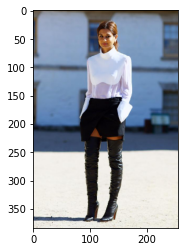

In [151]:
plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB)/255)

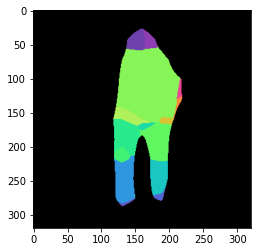

In [179]:
plt.imshow(bodypix_output(test_img))

In [170]:
test_img = cv2.resize(test_img, dsize=(img_w, img_h))
test_img.shape

(320, 320, 3)

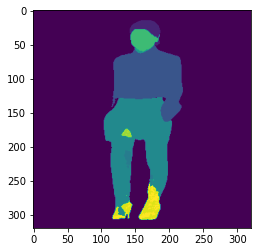

In [171]:
plt.imshow(tf.math.argmax(segnet_output(test_img), axis = -1))